In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd



input_dataset=pd.read_csv("final_train.csv")    #preprossed dataset
x = input_dataset.iloc[:, 1:38]
y = input_dataset.iloc[:, 38]

model=Sequential()

#Adding input layer and the first hidden layer
model.add(Dense(64, kernel_initializer= 'uniform',activation='linear', input_dim=37))
model.add(Dense(1, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(x,y,batch_size=100,epochs=100)

W=model.get_weights()

print ("done")
print (W)

#Predicting the val
val_dataset=pd.read_csv("final_validation.csv")

x_val = val_dataset.iloc[:, 1:38]
y_val = val_dataset.iloc[:, 38]

y_pred=model.predict(x_val)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val,y_pred)

from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_val,y_pred)*100)



Epoch 1/100
27499/27499 [==============================] - 1s 24us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 2/100
27499/27499 [==============================] - 0s 15us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 3/100
27499/27499 [==============================] - 0s 12us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 4/100
27499/27499 [==============================] - 0s 13us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 5/100
27499/27499 [==============================] - 0s 16us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 6/100
27499/27499 [==============================] - 0s 15us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 7/100
27499/27499 [==============================] - 0s 13us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 8/100
27499/27499 [==============================] - 0s 13us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 9/100
27499/27499 [==============================] - 0s 14us/step - loss: 0.4594 - accuracy: 0.7724
Epoch 10/100
27499/27499 [====================

In [11]:
from sklearn.metrics import classification_report,confusion_matrix


print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

from sklearn.metrics import f1_score

f1_score(y_val, y_pred, average='macro')

[[1610    0    0]
 [ 741    0    0]
 [ 398    0    0]]
              precision    recall  f1-score   support

           1       0.59      1.00      0.74      1610
           2       0.00      0.00      0.00       741
           3       0.00      0.00      0.00       398

    accuracy                           0.59      2749
   macro avg       0.20      0.33      0.25      2749
weighted avg       0.34      0.59      0.43      2749



0.2462338456832607


Train: 0.772, Test: 0.586


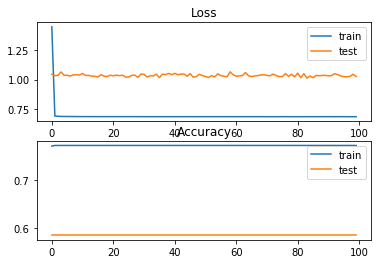

In [2]:
# mlp for the blobs multi-class classification problem with sparse cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
import pandas as pd

input_dataset=pd.read_csv("final_train.csv")    #preprossed dataset
trainX = input_dataset.iloc[:, 1:38]
trainy = input_dataset.iloc[:, 38]
# generate 2d classification dataset
#X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

val_dataset=pd.read_csv("final_validation.csv")

testX = val_dataset.iloc[:, 1:38]
testy = val_dataset.iloc[:, 38]

# split into train and test
#n_train = 500
#trainX, testX = X[:n_train, :], X[n_train:, :]
#trainy, testy = y[:n_train], y[n_train:]



# define model
model = Sequential()
model.add(Dense(50, input_dim=37, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [191]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')
from catboost import CatBoostClassifier 
from catboost import Pool




input_dataset=pd.read_csv("train_feature_0.005.csv")    #preprossed dataset
x = input_dataset.iloc[:, 0:14]
y = input_dataset.iloc[:, 14]


val_dataset=pd.read_csv("validation_feature_0.005.csv")

testX = val_dataset.iloc[:, 0:14]
testy = val_dataset.iloc[:, 14]

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(x)
X_test = scaler.transform(testX)

train_pool = Pool(data=X_train, label=y)
test_pool = Pool(data=X_test, label=testy)

# Fitting Random Forest Classification to the Training set

para = pd.DataFrame()

#classifier = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', max_depth=10, 
#                                    class_weight = {1:0.15,2:0.,3:0.99}, random_state = 3)   #class_weight = {1:0.15,2:0.9,3:0.97},

classifier=XGBClassifier(n_estimators=630,max_depth=10,
                         objective='multi:softprob',num_classes=3,  learning_rate=0.02)


#classifier.fit(X_train, y)





classifier = CatBoostClassifier(iterations=770,learning_rate=0.01, depth=1,
                           loss_function='MultiClass',
                           class_weights=[0.15,0.9,0.99],
                           random_state=3)
                          

classifier.fit(train_pool)
y_pred = classifier.predict(test_pool)

#y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(testy,y_pred))
print(classification_report(testy,y_pred))


from sklearn.metrics import f1_score
f1_score(testy, y_pred, average='macro')
                #ff = [i,j,q,f1_score(testy, y_pred, average='macro')]
                #para=para.append([ff],ignore_index=True)
                #print(ff)
    


Libraries Imported
0:	learn: 1.0960682	total: 3.74s	remaining: 47m 59s
1:	learn: 1.0935842	total: 7.49s	remaining: 47m 56s
2:	learn: 1.0910236	total: 11.2s	remaining: 47m 37s
3:	learn: 1.0885093	total: 14.8s	remaining: 47m 8s
4:	learn: 1.0860596	total: 18.4s	remaining: 46m 52s
5:	learn: 1.0850229	total: 18.4s	remaining: 39m 2s
6:	learn: 1.0840311	total: 18.4s	remaining: 33m 26s
7:	learn: 1.0815363	total: 21.9s	remaining: 34m 47s
8:	learn: 1.0791211	total: 25.4s	remaining: 35m 51s
9:	learn: 1.0767099	total: 29s	remaining: 36m 46s
10:	learn: 1.0743200	total: 32.7s	remaining: 37m 35s
11:	learn: 1.0719514	total: 36.2s	remaining: 38m 9s
12:	learn: 1.0695386	total: 39.8s	remaining: 38m 36s
13:	learn: 1.0671461	total: 43.3s	remaining: 38m 58s
14:	learn: 1.0662346	total: 43.3s	remaining: 36m 20s
15:	learn: 1.0653621	total: 43.3s	remaining: 34m 1s
16:	learn: 1.0630645	total: 46.9s	remaining: 34m 37s
17:	learn: 1.0607958	total: 50.7s	remaining: 35m 17s
18:	learn: 1.0600303	total: 50.7s	remaining

0.3244262258696138

In [63]:
x

,Gender,Age,Income,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Discount_Rate,...,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,week_end/day
0,1,3,2,2,1,0,0,0,0,40,...,0,0,1,0,0,0,1,0,1,0
1,1,3,3,2,2,2,1,0,1,5,...,0,0,1,0,0,1,0,0,2,0
2,1,0,1,1,1,0,0,0,1,10,...,0,1,0,1,0,0,0,1,2,1
3,1,0,1,2,1,1,0,0,1,0,...,0,1,0,1,0,0,0,1,2,0
4,0,0,1,4,2,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,1,1,2,2,2,2,1,0,1,0,...,0,0,1,0,0,0,0,1,2,0
12963,1,1,1,2,2,0,0,0,0,25,...,0,0,1,0,0,0,0,1,1,1
12964,1,0,2,1,1,0,0,0,1,25,...,0,0,1,0,0,1,0,0,1,1
12965,0,1,4,3,2,1,0,0,1,10,...,1,0,1,0,0,0,1,0,1,1


In [192]:
test_O=pd.read_csv("test_feature_0.004.csv")

pr = classifier.predict(test_O.iloc[:,0:14])

results = pd.DataFrame()
results['Reservation-id']=test_O['Reservation-id']
results['Reservation_status']=pr
#results.to_csv('Results10.csv',header=True,index=False)


In [68]:
pd.set_option('display.max_columns',None)
test_O



,Reservation-id,Gender,Age,Income,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,week_end/day
0,62931593,1,2,2,3,3,0,0,0,1,10,153,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1
1,70586099,1,2,2,2,1,0,0,0,0,0,210,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,1
2,4230648,1,0,1,2,2,0,0,0,0,5,117,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,3,1
3,25192322,1,3,2,1,3,2,0,0,1,10,107,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,2,1
4,80931528,0,1,2,3,1,0,0,0,0,0,119,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,0,2,3,3,3,1,1,0,1,0,153,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0
4314,5496554,1,3,3,3,3,0,0,0,1,40,233,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,3,0
4315,59004046,1,2,1,2,3,0,0,0,1,0,242,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
4316,65838682,0,1,2,4,2,1,0,0,1,0,208,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0


In [21]:
results

,Reservation-id,Reservation_status
0,62931593,1
1,70586099,3
2,4230648,1
3,25192322,1
4,80931528,1
...,...,...
4313,39110574,1
4314,5496554,1
4315,59004046,2
4316,65838682,1


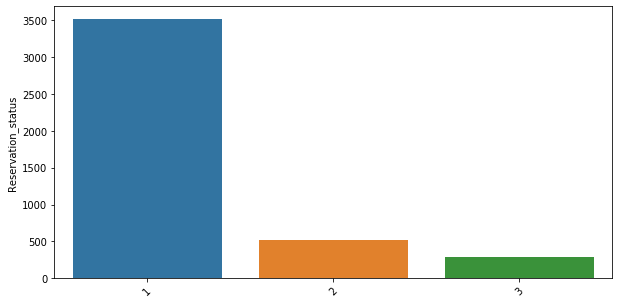

In [193]:
import seaborn as sn
import matplotlib.pyplot as plt
cat_num = results['Reservation_status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()


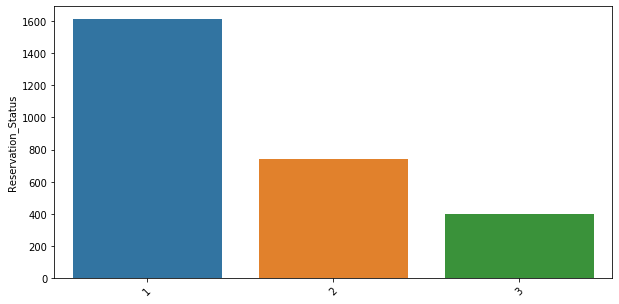

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt
cat_num = val_dataset['Reservation_Status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

In [179]:
cat_num

1    2417
2    1101
3     800
Name: Reservation_status, dtype: int64